#### Importing the libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [65]:
df = pd.read_csv('D:\\Data Science\\Projects\\Black friday sales pred analysis\\train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [66]:
# stats
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [67]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [68]:
# unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

#### Exploratory Data Analysis

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

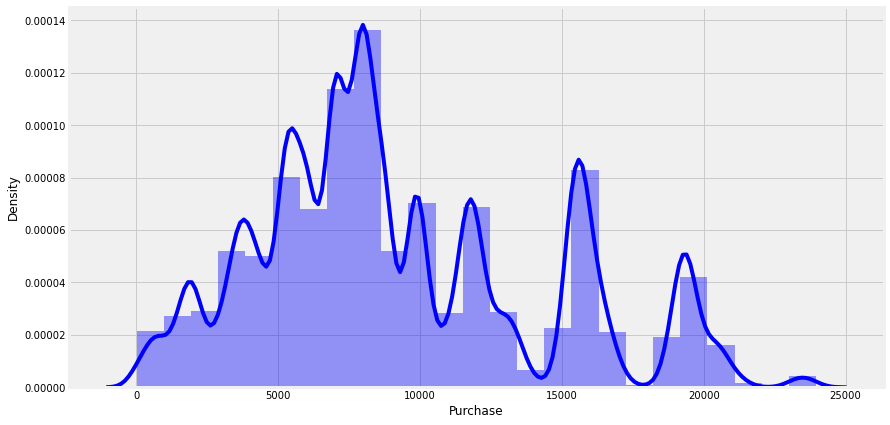

In [69]:
# distplot for purchase
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25, color='blue')

<AxesSubplot:xlabel='Gender', ylabel='count'>

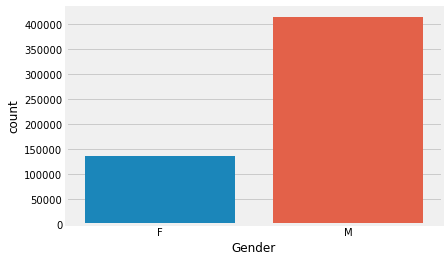

In [70]:
# distribution of numeric variables
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

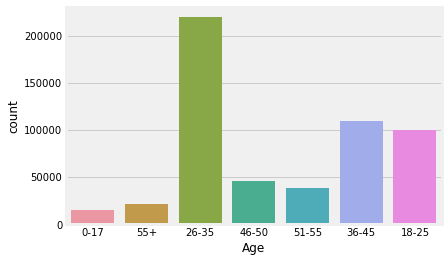

In [71]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

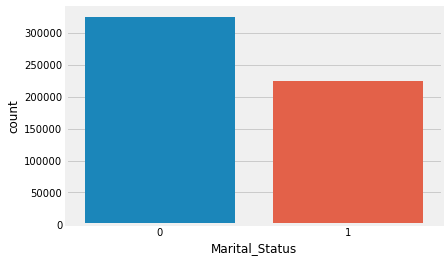

In [72]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

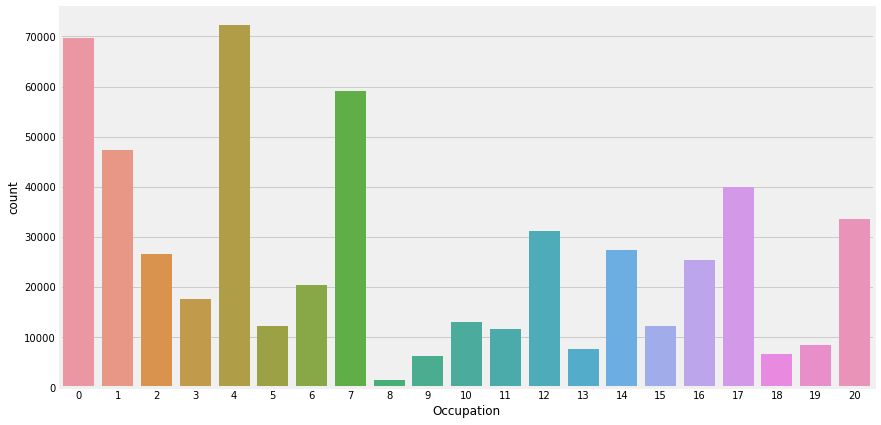

In [73]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

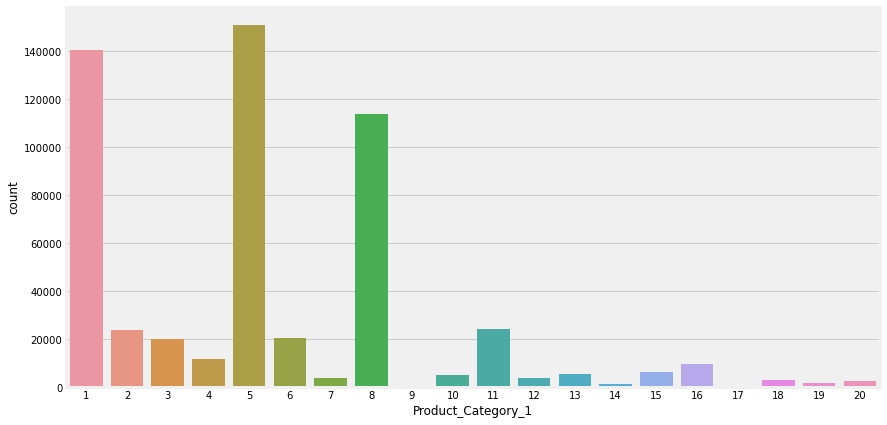

In [74]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

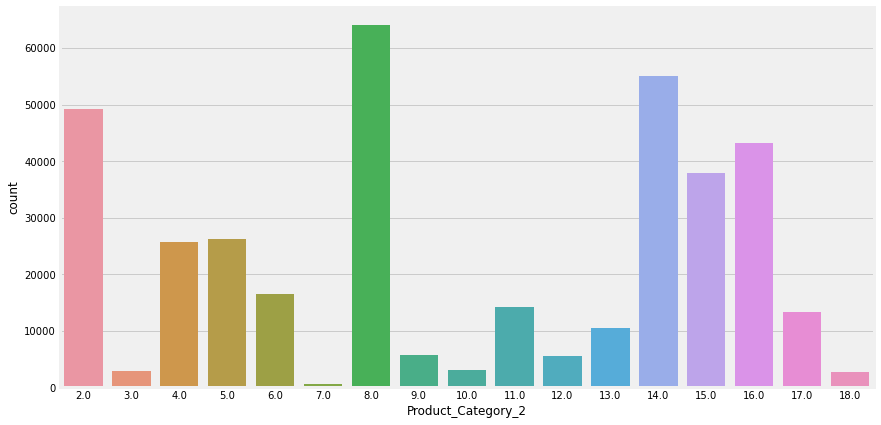

In [75]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Product_Category_2'])

(<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>,)

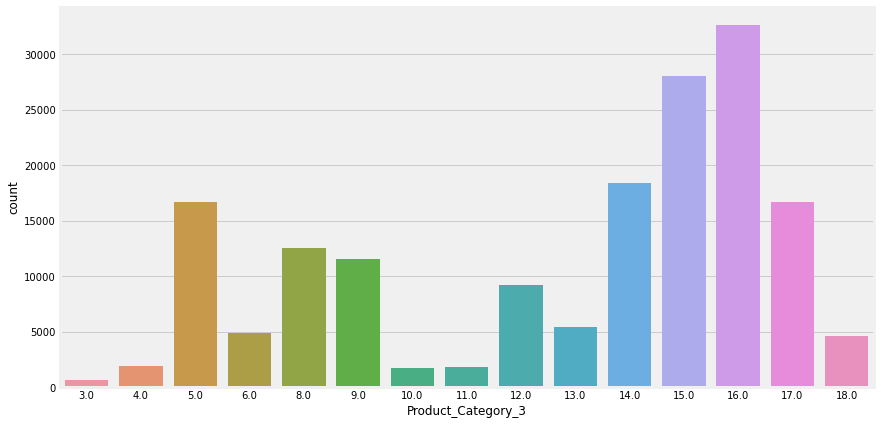

In [76]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Product_Category_3']),

<AxesSubplot:xlabel='City_Category', ylabel='count'>

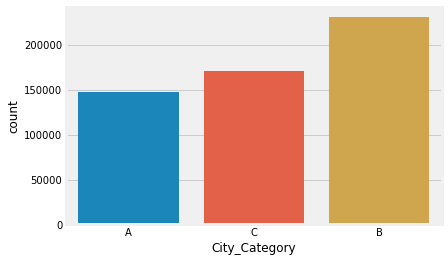

In [77]:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

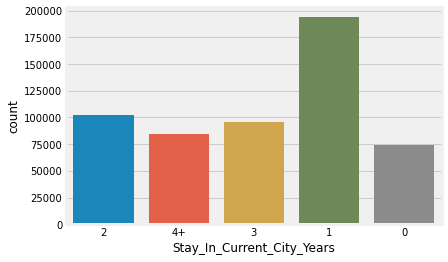

In [78]:
sns.countplot(df['Stay_In_Current_City_Years'])

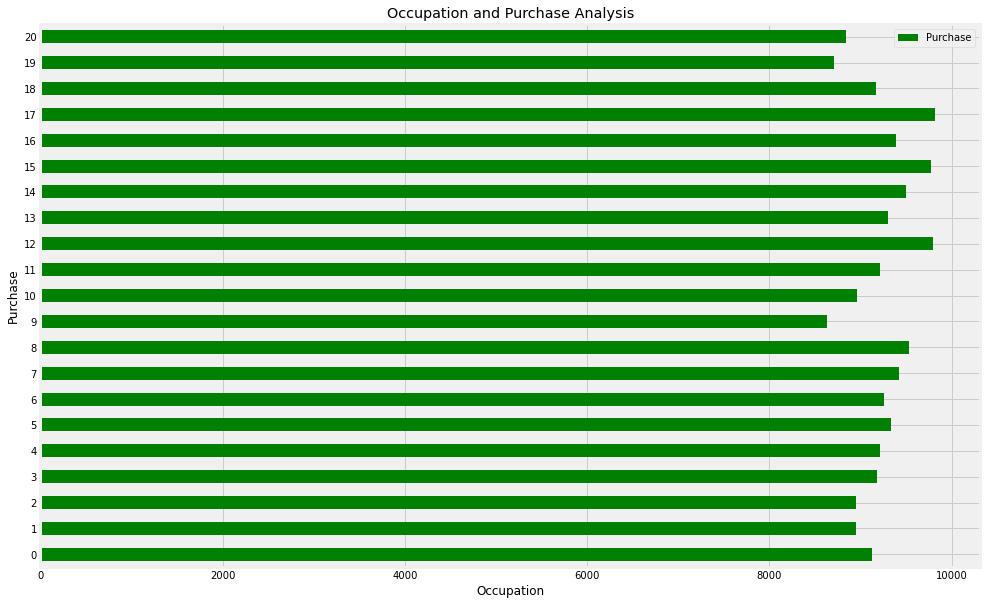

In [79]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='barh', figsize=(15, 10),color='green')
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

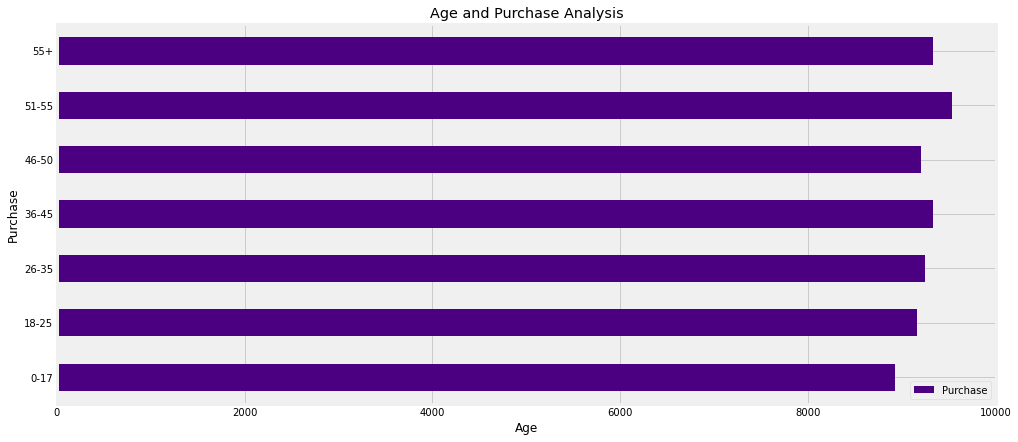

In [80]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='barh', figsize=(15, 7), color='indigo')
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

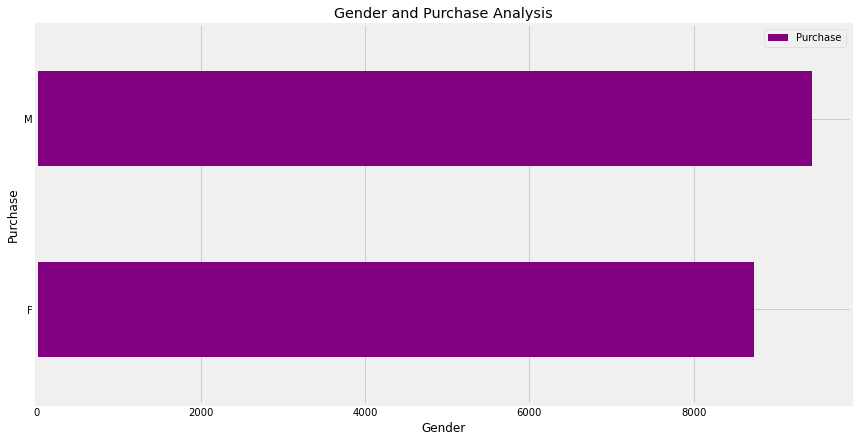

In [81]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='barh', figsize=(13, 7), color='purple')
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Preprocessing the dataset

In [82]:
# checking for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [83]:
# Filling the null values with any negative integer
df['Product_Category_2'] = df['Product_Category_2'].fillna(-1.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-1.0).astype("float32")

In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [22]:
# encoding values in gender column using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-1.0,-1.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-1.0,-1.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-1.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-1.0,-1.0,7969


In [23]:
# label encoding

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-1.0,-1.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-1.0,-1.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-1.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-1.0,-1.0,7969


#### Co-relation Matrix



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'User_ID'),
  Text(1.5, 0, 'Gender'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Occupation'),
  Text(4.5, 0, 'City_Category'),
  Text(5.5, 0, 'Stay_In_Current_City_Years'),
  Text(6.5, 0, 'Marital_Status'),
  Text(7.5, 0, 'Product_Category_1'),
  Text(8.5, 0, 'Product_Category_2'),
  Text(9.5, 0, 'Product_Category_3'),
  Text(10.5, 0, 'Purchase')])

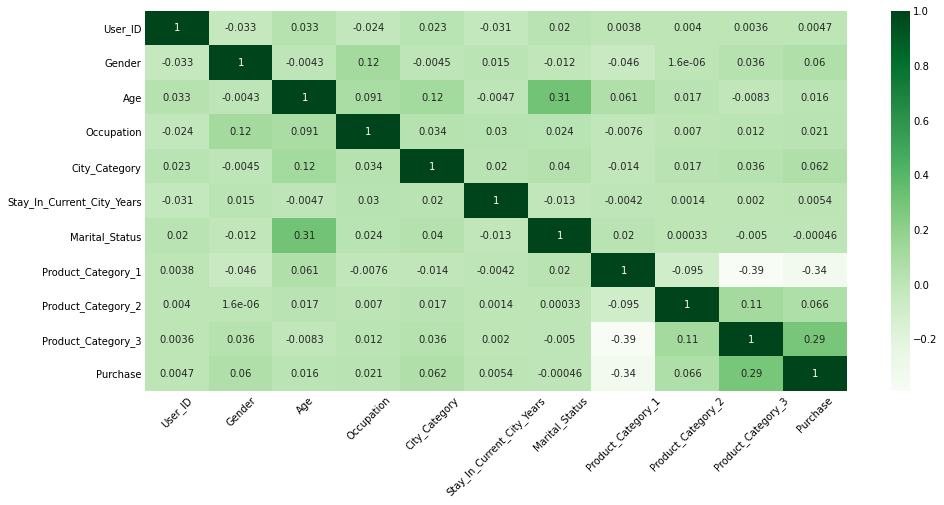

In [24]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.xticks(rotation=45)

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-1.0,-1.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-1.0,-1.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-1.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-1.0,-1.0,7969


In [26]:
# removing unwwanted columns
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

#### Model Training

In [62]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
    
# train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

def train(model, X, y):

    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4619.4712867435555
CV Score: 4626.683572392809


<AxesSubplot:title={'center':'Model Coefficients'}>

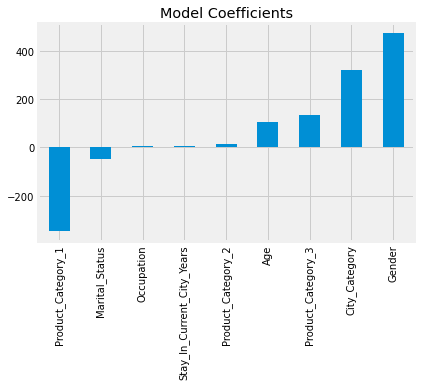

In [28]:
#deploying first model

from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3367.157542057315
CV Score: 3339.020475353953


<AxesSubplot:title={'center':'Feature Importance'}>

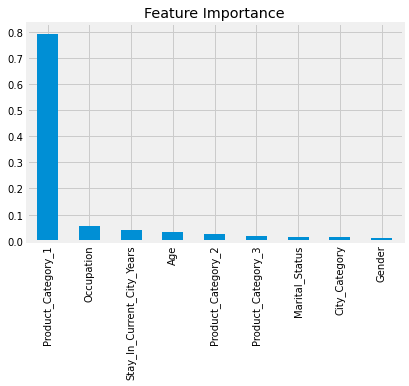

In [29]:
#deploying second model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3194.811395796429
CV Score: 3180.460385561439


<AxesSubplot:title={'center':'Feature Importance'}>

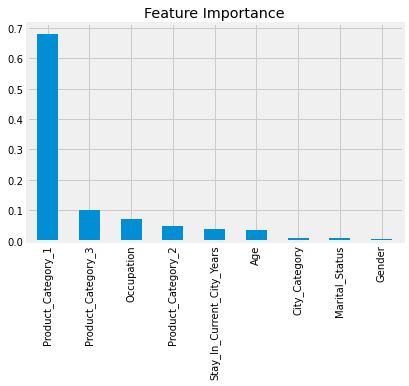

In [30]:
#deploying third model

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3062.6732146556787
CV Score: 3052.7490966317096


<AxesSubplot:title={'center':'Feature Importance'}>

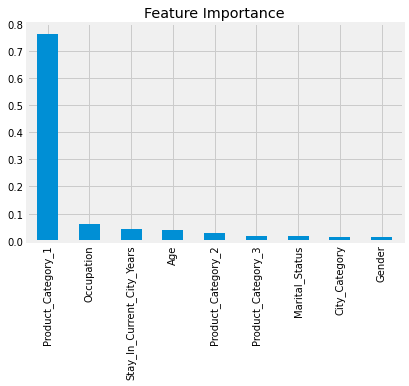

In [31]:
#deploying fourth model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 2884.923607070667
CV Score: 2880.717164606894


<AxesSubplot:title={'center':'Feature Importance'}>

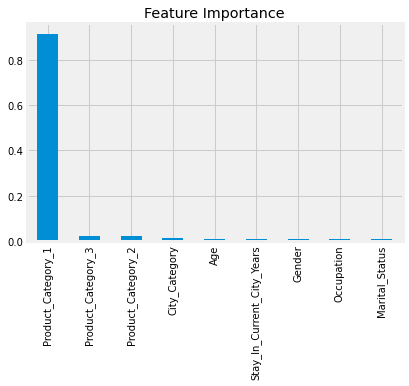

In [33]:
#deploying fifth model

from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## XGBRegressor has the highest accuracy due to its low CV score and Mean Squared Error

**and Product Category-1 hase the highest sales**


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Applying the model on the test set

In [92]:
x_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
84432,1,5,19,2,3,0,1,2.0,16.0
72724,0,3,11,1,1,0,1,15.0,16.0
197032,0,3,0,0,2,1,8,15.0,-1.0
353704,1,1,4,0,3,0,1,15.0,16.0
91198,1,1,4,1,0,0,6,8.0,16.0


In [93]:
#determining purchase from the test variable
df2 = pd.read_csv('D:\\Data Science\\Projects\\Black friday sales pred analysis\\test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [94]:
# df2.isnull().sum()

In [95]:
df2['Product_Category_2'] = df2['Product_Category_2'].fillna(-1.0).astype("float32")
df2['Product_Category_3'] = df2['Product_Category_3'].fillna(-1.0).astype("float32")

gender_dict = {'F':0, 'M':1}
df2['Gender'] = df2['Gender'].apply(lambda x: gender_dict[x])

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

for col in cols:
    df2[col] = le.fit_transform(df2[col])
    
X_test = df2.drop(columns=['User_ID', 'Product_ID'])
y = df['Purchase']

In [98]:
# x_test = df2.drop(columns=['User_ID', 'Product_ID'])
pred = model.predict(X_test)

final_df = pd.DataFrame()
final_df['User_ID'] = df2['User_ID']
final_df['Purchase'] = pred
final_df.head()

,User_ID,Purchase
0,1000004,14667.819778
1,1000009,10592.317810
2,1000010,8301.368238
3,1000010,2303.323333
4,1000011,3000.987857


#### Hence, the predicted values of purchase is determined

In [ ]:
# final_df.to_csv('submission.csv', index=False)